In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
import tensorflow_addons as tfa
import os
from distutils.dir_util import copy_tree, remove_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator as IDG
import keras
import cv2


In [28]:
base='./data2/'
# root_dir='./'
test=base+"test/"
train=base+"train/"
wdr="./dataset4/"
# if os.path.exists(wdr):
#     remove_tree(wdr)
# os.mkdir(wdr)
# copy_tree(train,wdr)
# copy_tree(test,wdr)
print("wdc:",os.listdir(wdr))

wdc: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [29]:
work='./dataset4/'
classes=['glioma', 'meningioma', 'notumor', 'pituitary']
idm=176
ida=[176,208]
DIM=(idm,idm)

In [30]:
train_data_gen = IDG(rescale=1./255)
# train_data_gen=train_data_gen.flow_from_directory(directory=work,target_size=DIM,batch_size=6500)
train_data_gen = train_data_gen.flow_from_directory(directory=work, target_size=DIM, batch_size=10185) #12 for more good res

Found 10185 images belonging to 4 classes.


In [31]:
train_data,train_labels=train_data_gen.next()

In [32]:
sm=SMOTE(random_state=42)
train_data,train_labels=sm.fit_resample(train_data.reshape(-1,idm*idm*3),train_labels)
train_data=train_data.reshape(-1,idm,idm,3)
print(train_data.shape,train_labels.shape)

(10636, 176, 176, 3) (10636, 4)


In [33]:
train_data,test_data,train_labels,test_labels=train_test_split(train_data,train_labels,test_size=0.2,random_state=42)
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,test_size=0.2,random_state=42)

In [34]:
model_paths = ['./btmodels/btm5.h5', './btmodels/BT_CNN_model_inc_1','./btmodels/BT_CNN_Res_model_t1', './btmodels/BT_CNN_model7',"./btmodels/BT_CNN_model_RN2","./btmodels/BT_CNN_model_DN1","./btmodels/BT_CNN_model_RN3"]
models = [load_model(path, custom_objects={'F1Score': tfa.metrics.F1Score}) for path in model_paths]

In [35]:
def evaluate_model(model, data, labels):
    res=model.evaluate(data,labels)
    return res[0],res[1] 

In [36]:
accuracies = []
losses = []

In [37]:
for model in models:
    if model == models[0]:  # For the first model with different input shape
        resized_test_data = np.array([cv2.resize(img, (208, 176)) for img in test_data])
    else:  # For the rest of the models
        resized_test_data = test_data  # No resizing needed

    loss, accuracy = evaluate_model(model, resized_test_data, test_labels)
    losses.append(loss)
    accuracies.append(accuracy)

67/67 [==============================] - 625s 9s/step - loss: 0.1060 - train_acc: 0.9718 - val_acc: 0.9966 - f1_score: 0.9712


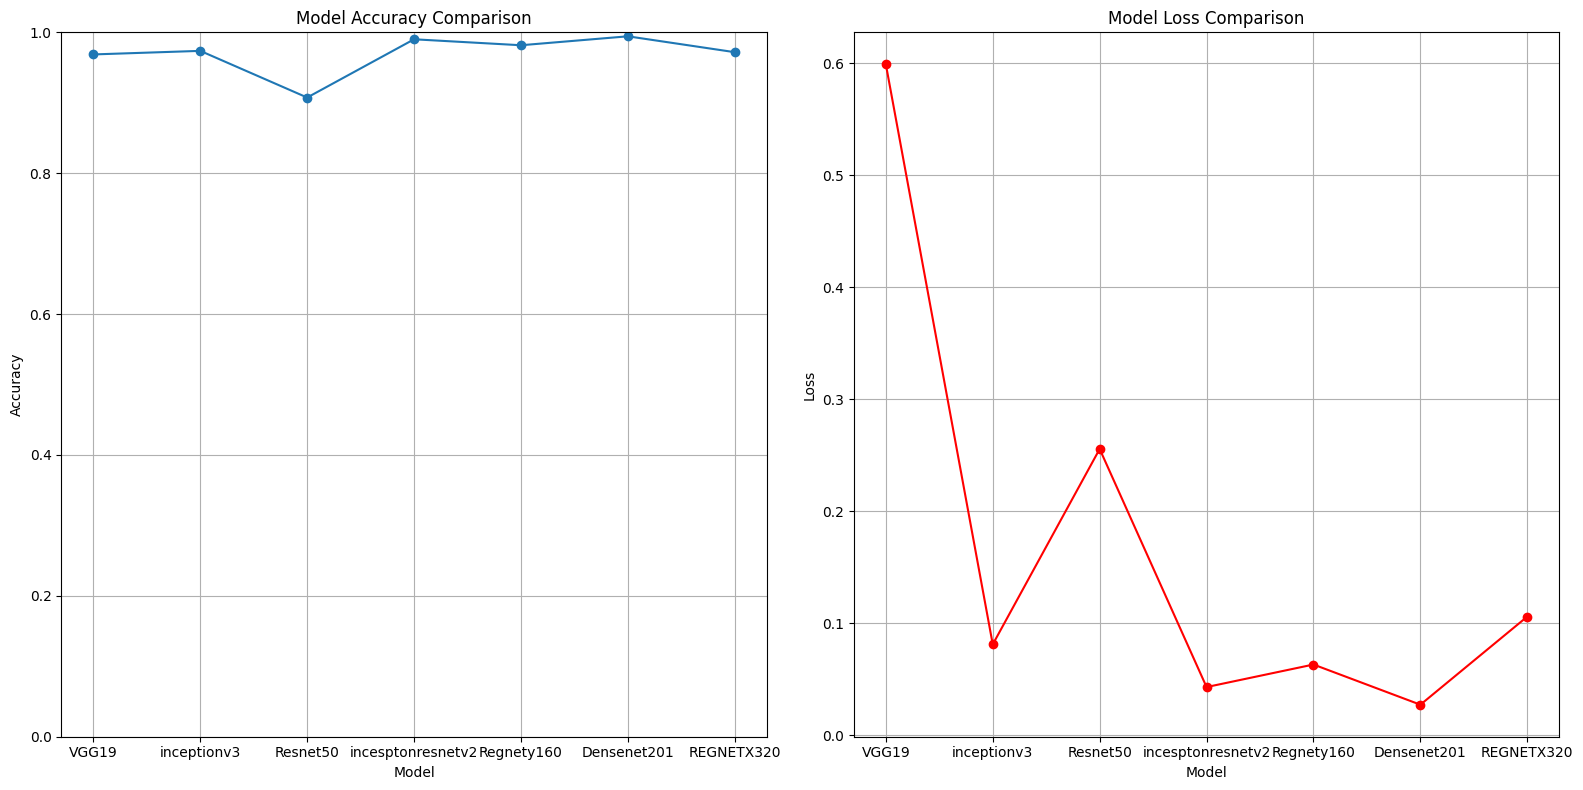

In [45]:
model_names = ['VGG19','inceptionv3','Resnet50', 'incesptonresnetv2',"Regnety160","Densenet201","REGNETX320"]
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].plot(model_names, accuracies, marker='o')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_ylim(0, 1)
axs[0].set_xticks(model_names)
axs[0].grid(True)

axs[1].plot(model_names, losses, marker='o', color='r')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Loss Comparison')
axs[1].set_xticks(model_names)
axs[1].grid(True)

plt.tight_layout()
plt.show()